In [ ]:
# !pip install detecto
import os
import re
import torch
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as PImage
import cv2
from sklearn.metrics import accuracy_score
from pathlib import Path

In [ ]:
root_dir = Path('data')

TEST_PATH = 'data/test/img/'

In [ ]:
labels_dict = {
    'А': 'A', 'В': 'B', 'С': 'C', 'Е': 'E', 'Н': 'H', 'К': 'K', 'М': 'M', 'О': 'O', 'Р': 'P', 'Т': 'T', 'Х': 'X', 'У': 'Y',
    '0': '0', '1': '1', '2': '2', '3': '3', '4': '4', '5': '5', '6': '6', '7': '7', '8': '8', '9': '9'
}

## Тестирование модели

In [ ]:
# этот блок используется для тестирования модели без обучения

In [ ]:
labels = ['0','1','2','3','4','5','6','7','8','9', 'А', 'В', 'С', 'Е', 'Н', 'К', 'М', 'О', 'Р', 'Т', 'Х', 'У']
# загрузка весов обученной модели
path_to_weights = root_dir.joinpath('detecto/model/', 'model_weights_2.pth')

In [ ]:
# Инициализируем модель с нашими весами и метками. 
model_inference = core.Model.load(path_to_weights, labels)

In [ ]:
def loadImages(path):
    # return array of images

    imagesList = os.listdir(path)
    image_names = []
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(np.array(img))
        image_names.append(image.split('.')[0])

    return loadedImages, image_names


# your images in an array
imgs, img_names = loadImages(TEST_PATH)

A007AE799


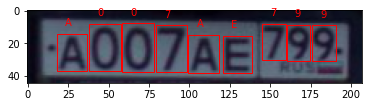

In [ ]:
img = imgs[9]

labels, boxes, scores = model.predict(img)
thresh=0.6
filtered_indices = np.where(scores > thresh)
filtered_boxes = boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
# Так как получаем метки классов в перемешанном виде (не в той последовательности, как на номере)
# то будем их сортировать по кординате xmin сделав словарь. 
symbols_dict = {}
number_symbols = filtered_boxes.shape[0]
for i in range(0, number_symbols):
    symbols_dict[float(filtered_boxes[i][0])] = filtered_labels[i]
pred = ''.join([labels_dict[x] for x in list(dict(sorted(symbols_dict.items())).values())])
print(pred)
labels, boxes, scores = model.predict(img)

visualize.show_labeled_image(img, filtered_boxes, filtered_labels)

In [ ]:
%%time
res_preds = []
for img, img_name in zip(imgs, img_names):
    try:
        labels, boxes, scores = model.predict(img)
        thresh=0.6
        filtered_indices = np.where(scores > thresh)
        filtered_boxes = boxes[filtered_indices]
        num_list = filtered_indices[0].tolist()
        filtered_labels = [labels[i] for i in num_list]
        # Так как получаем метки классов в перемешанном виде (не в той последовательности, как на номере)
        # то будем их сортировать по кординате xmin сделав словарь. 
        symbols_dict = {}
        number_symbols = filtered_boxes.shape[0]
        for i in range(0, number_symbols):
            symbols_dict[float(filtered_boxes[i][0])] = filtered_labels[i]
        plate = ''.join([labels_dict[x] for x in list(dict(sorted(symbols_dict.items())).values())])
        res_preds.append(plate)
    except:
        res_preds.append('')     

Wall time: 1min 40s


In [ ]:
len(res_preds), len(img_names)

(2845, 2845)

In [ ]:
accuracy_score(img_names, res_preds)

0.745518453427065